No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


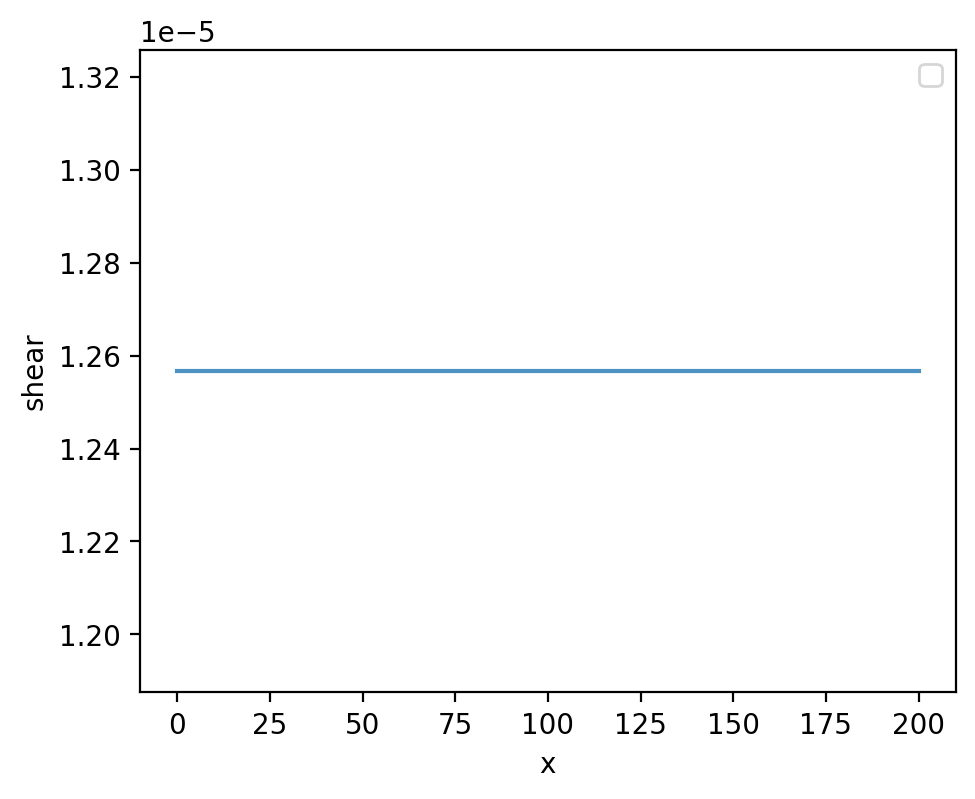

0.0 time
0.23228702837643891 u_inlet
0.001001001001001001 time
0.10370049071632036 u_inlet
0.002002002002002002 time
0.10340436514327735 u_inlet
0.003003003003003003 time
0.10327171851060987 u_inlet
0.004004004004004004 time
0.10323962972035537 u_inlet
0.005005005005005005 time
0.1033147780410316 u_inlet
0.006006006006006006 time
0.1034960366358539 u_inlet
0.007007007007007007 time
0.10378314975558126 u_inlet
0.008008008008008008 time
0.10417575245493652 u_inlet
0.009009009009009009 time
0.10467348156581525 u_inlet


In [14]:
import numpy as np
import os
import time 
import math as mt
import matplotlib.pyplot as plt
from Modules.Momentum import Momentum
from Modules.Pressure import Pressure_adjust
from Update.Pressure_update import add
from Modules.convergence import convergence
from Modules.Pressure import Pressure_adjust
#from Plots.Pressure_plot import plot_pressure
from Plots.Plot import Graph_PV,plot
from Plots.Velocity_plot import Graph_V,plot_V
from Plots.Velocity_w_Time import Graph_V_w_time,plot_V_time,plot_P_time
from Plots.Pressure_plot import  Graph_P,plot_P 
from Plots.Area_profile import Graph_Area_profile,plot_Area
from Plots.Time_averaged_shear import Graph_shear,plot_shear
from Modules.Correct_velocity import Correct_velocity
from Modules.Correct_pressure import Correct_pressure
from Area.linear_area import Linear_area_profile, Const_area_profile,Area,stenoisis_Area5
from Boundary_conditions.velocity_p_time import velocity,Pressure
from Modules.friction_factor import friction_factors_shear
import pandas as pd
from Modules.mechanical_model import area
from Interpolate.inter import interpolate_Area

"""
const paramers through-out the analysis
All units are taken in SI system (Kilogram,Meter,Second)

"""
Total_time=1.0
#dt = 0.001                        # Time step size                 # Number of time steps
rho=1000                         # Density kg/m3
g = 9.8                                # Gravitational acceleration m/s2
Grid_points=100          #Total number of grid points (Cell centres including extra cell at the end)
d_vis=0.0035
dt=0.001
n=int(Total_time/dt)
length=0.126                             #m
dx = length/Grid_points 




"""
Initialize the velocity 
"""


u_n = np.zeros(Grid_points+1) 
A_n=np.zeros(2*Grid_points+1)


def unsteady_1D_flow(A_n,u_n,Grid_points,rho,dx,dt,d_vis,n):
    graph_v=Graph_V()
    Time=np.linspace(0,1,n)
    #len of p_star is u_star-1
    u_star = np.zeros(Grid_points+1) 
    Area=np.zeros(2*Grid_points+1)  
    p_s=np.zeros(2*Grid_points+1) 
    
    A_n=np.ones(2*Grid_points+1)*(mt.pi*(0.002)**2)
    u_inlet=velocity(A_n[0],Time[0])
    for i in range(1,len(u_n)):
        u_n[i]=0.1  
              
    u_star=u_n
    Area=A_n
    start_time=time.time()
    x2=np.arange(len(Area))
    plot_V(Area,x2,graph_v)
    plt.pause(1)  
    for t in range(0,10):
        
        print(Time[t],"time")
        p_s=2*(np.sqrt(np.pi*Area))
        u_inlet=velocity(Area[0],Time[t])
        if u_inlet<=0:
            u_inlet=0.000001
        u_n[0]=u_inlet
        #print(u_inlet,"u_inlet")
        p_exit=Pressure(Time[t])*(10**3)
        print(u_n[0],"u_inlet")
        #u_star=Momentum(p_star,u_n,u_star,Grid_points,rho,dt,dx,d_vis,A_n,Area,p_s,u_inlet,p_exit) 
        i=0
        while i<0:
            i=i+1
            print(i)
            converge=convergence(u_star,Grid_points,rho,Area,A_n,dx,dt)
            print(converge,"converge")
            if converge<10**-3:
                break                                                                         
            p_add=Pressure_adjust(u_star,Grid_points,u_n,Area,A_n,p_s,rho,dx,dt,d_vis,u_inlet,p_exit)
            relaxation_factor=0.8
            p_add=relaxation_factor*p_add
            #p_star=add(p_add,p_star,relaxation_factor)
            u_star=Correct_velocity(u_star,p_add,Grid_points,rho,dt,dx,d_vis,A_n,Area,u_n,p_s)
            #p_star=Correct_pressure(p_star,u_n,u_star,Grid_points,rho,dt,dx,d_vis,A_n,Area,p_s)
            #u_star=Momentum(p_star,u_n,u_star,Grid_points,rho,dt,dx,d_vis,A_n,Area,p_s,u_inlet,p_exit)
        
        p_star=Correct_pressure(p_exit,u_n,u_star,Grid_points,rho,dt,dx,d_vis,A_n,Area,p_s)
        u_n=u_star
        A_n=Area
        Area=area(p_star)
        Area=interpolate_Area(Area)  
        plt.show()    
    return u_star,p_star

"""
Final result 
"""
velocity,pressure =unsteady_1D_flow(A_n,u_n,Grid_points,rho,dx,dt,d_vis,n)



